## Graphing the control evaluation round

This round used a straight forward fitness function that only considered the game score. It's purpose was to show that the model was viable and ready for a longer training round. It also serves to show that despite the randomness inherent to this area of study that the processes are repeatable.

Let's begin by plotting the raw data. 

Text(0, 0.5, 'Best solution')

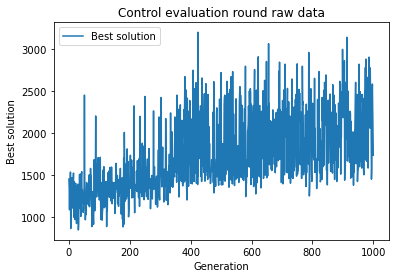

In [1]:
import numpy as np
import pandas as pd
from math import floor
import matplotlib.pyplot as plt

control = pd.read_csv('./data/evaluate_control.csv',names=["Best solution"])
control.round(0)
control.astype(int)
control.style.set_caption("Raw control evaluation")

ax = control.plot.line()
ax.set_title("Control evaluation round raw data")
ax.set_xlabel("Generation")
ax.set_ylabel("Best solution")

The results from training are noisy because of the randomness inherent to 2048. Individuals which may have thrived in a previous round can fail with only slight differences in random tile placement.

To clarify any trends, in the following graph, every generation's value is the average of itself and the 9 preceding values.

Text(0, 0.5, 'Best solution')

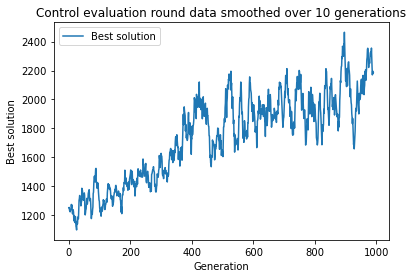

In [2]:
import numpy as np
import pandas as pd
from math import floor
import matplotlib.pyplot as plt

control = pd.read_csv('./data/evaluate_control.csv',names=["Best solution"])
control.round(0)
control.astype(int)

raw = [floor(row[0]) for row in control.values]
smoothed = []
for (i,s) in enumerate(raw[10:]):
    smoothed.append(sum(raw[i:i+10])/10)

graph = pd.DataFrame({"Best solution": smoothed})
    
ax = graph.plot.line()
ax.set_title("Control evaluation round data smoothed over 10 generations")
ax.set_xlabel("Generation")
ax.set_ylabel("Best solution")

The trend of increasing scores over time immediately appears. This is still a very jagged graph, so let's smooth to the average value of the generation and the 49 preceding generations.

Text(0, 0.5, 'Best solution')

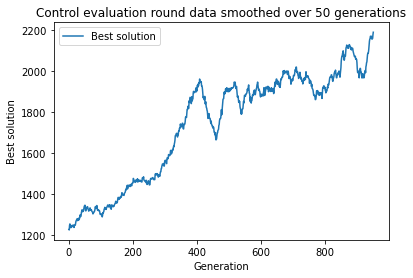

In [3]:
import numpy as np
import pandas as pd
from math import floor
import matplotlib.pyplot as plt

control = pd.read_csv('./data/evaluate_control.csv',names=["Best solution"])
control.round(0)
control.astype(int)

raw = [floor(row[0]) for row in control.values]
smoothed = []
for (i,s) in enumerate(raw[50:]):
    smoothed.append(sum(raw[i:i+50])/50)

graph = pd.DataFrame({"Best solution": smoothed})

ax = graph.plot.line()
ax.set_title("Control evaluation round data smoothed over 50 generations")
ax.set_xlabel("Generation")
ax.set_ylabel("Best solution")

We can now clearly see that the individuals are becoming more skilled, even if particular generations may not perform well due to randomness.

This evaluation round can give us confidence to begin the longer experiment round, and it also serves as proof that the model is viable and can be repeated.

Before beginning experiments, I also ran an [evaluation round with the variation fitness function](variation%20evaluation.ipynb).